In [1]:
import pandas as pd
import numpy as np 

# file name 
file_path = 'online_retail_II.xlsx' 

try:
    # Loading the first sheet (Year 2009-2010)
    df_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
    print("Successfully loaded 'Year 2009-2010' sheet.")

    # Loading the second sheet (Year 2010-2011)
    df_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011')
    print("Successfully loaded 'Year 2010-2011' sheet.")

    # --- Combining the two dataframes ---
    # I use pd.concat to stack them on top of each other.
    # ignore_index=True resets the index, which is important when combining.
    df = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)
    print("\nSuccessfully combined both datasets into a single DataFrame 'df'.")
    print(f"Total number of rows in combined DataFrame: {len(df)}")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print(f"Please make sure you have downloaded '{file_path}' from Kaggle and placed it in the same directory as your Jupyter Notebook.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

Successfully loaded 'Year 2009-2010' sheet.
Successfully loaded 'Year 2010-2011' sheet.

Successfully combined both datasets into a single DataFrame 'df'.
Total number of rows in combined DataFrame: 1067371


### Data Acquisition & Initial Exploration

In [2]:
# ---  Initial Inspection of the combined DataFrame ---

print("--- First 5 rows of the combined DataFrame ---")
print(df.head())

print("\n--- DataFrame Information (df.info()) ---")
df.info()

print("\n--- Descriptive Statistics for Numerical Columns (df.describe()) ---")
print(df.describe())

print("\n--- Count of Missing Values (df.isnull().sum()) ---")
print(df.isnull().sum())

--- First 5 rows of the combined DataFrame ---
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

--- DataFrame Information (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column      

In [3]:
# --- Handling Missing Customer ID ---
# This is a Critical step: I will Drop rows where Customer ID is NaN, as i cannot segment unknown customers.

original_rows = len(df)
df.dropna(subset=['Customer ID'], inplace=True)
rows_after_customer_id_drop = len(df)

print(f"Original rows: {original_rows}")
print(f"Rows after dropping missing Customer IDs: {rows_after_customer_id_drop}")
print(f"Rows removed due to missing Customer ID: {original_rows - rows_after_customer_id_drop}")

# Convert Customer ID to integer after dropping NaNs
df['Customer ID'] = df['Customer ID'].astype(int)
print("Customer ID column successfully converted to integer type.")

# Re-check missing values after this step
print("\n--- Missing values after handling Customer ID ---")
print(df.isnull().sum())

Original rows: 1067371
Rows after dropping missing Customer IDs: 824364
Rows removed due to missing Customer ID: 243007
Customer ID column successfully converted to integer type.

--- Missing values after handling Customer ID ---
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [4]:
# ---  Handling Negative Quantity and Price ---
# I will Remove rows with non-positive Quantity or Price, as these are returns/cancellations or invalid data.

rows_before_neg_filter = len(df)
df = df[df['Quantity'] > 0] # Keep only positive quantities
df = df[df['Price'] > 0]    # Keep only positive prices

rows_after_neg_filter = len(df)

print(f"Rows before filtering for positive Quantity/Price: {rows_before_neg_filter}")
print(f"Rows after filtering for positive Quantity/Price: {rows_after_neg_filter}")
print(f"Rows removed due to non-positive Quantity or Price: {rows_before_neg_filter - rows_after_neg_filter}")

# Displaying descriptive statistics again is very immportant to confirm Quantity and Price are now positive
print("\n--- Descriptive Statistics after handling Quantity/Price negatives ---")
print(df[['Quantity', 'Price']].describe())

# I'ts Necessary to Re-check for any remaining missing values but i think it should still be zero after previous step
print("\n--- Missing values after handling Quantity/Price negatives ---")
print(df.isnull().sum())

Rows before filtering for positive Quantity/Price: 824364
Rows after filtering for positive Quantity/Price: 805549
Rows removed due to non-positive Quantity or Price: 18815

--- Descriptive Statistics after handling Quantity/Price negatives ---
            Quantity          Price
count  805549.000000  805549.000000
mean       13.290522       3.206561
std       143.634088      29.199173
min         1.000000       0.001000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   10953.500000

--- Missing values after handling Quantity/Price negatives ---
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [5]:
# --- Creating TotalPrice Column ---
# Calculating the TotalPrice for each transaction line item (Quantity * Price)

df['TotalPrice'] = df['Quantity'] * df['Price']

print("\n--- First 5 rows with the new 'TotalPrice' column ---")
print(df.head())

print("\n--- Descriptive Statistics for 'TotalPrice' ---")
print(df['TotalPrice'].describe())

# Re-checking info to confirm new column and its type
print("\n--- DataFrame Information after adding TotalPrice ---")
df.info()


--- First 5 rows with the new 'TotalPrice' column ---
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom        81.0  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom       100.8  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom        30.0  

--- Descriptive Statistics for 'TotalPrice' ---
count    805549.000000
mean         22.0265

### Feature Engineering for RFM Analysis

In [6]:
# ---  Calculating Recency (R) ---

# I'ts important to find the most recent date in the entire dataset
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Snapshot Date for Recency calculation: {snapshot_date}")

# Calculate Recency: days since last purchase for each customer
# Group by 'Customer ID', finding the latest 'InvoiceDate', then will calculate the difference in days
rfm_r = df.groupby('Customer ID')['InvoiceDate'].max().reset_index()
rfm_r.columns = ['Customer ID', 'LastPurchaseDate']
rfm_r['Recency'] = (snapshot_date - rfm_r['LastPurchaseDate']).dt.days

# Display the first few rows of the Recency calculation
print("\n--- Recency (R) Calculation ---")
print(rfm_r.head())

# Drop the 'LastPurchaseDate' as we only need 'Recency' for the final RFM table
rfm_r = rfm_r[['Customer ID', 'Recency']]

Snapshot Date for Recency calculation: 2011-12-10 12:50:00

--- Recency (R) Calculation ---
   Customer ID    LastPurchaseDate  Recency
0        12346 2011-01-18 10:01:00      326
1        12347 2011-12-07 15:52:00        2
2        12348 2011-09-25 13:13:00       75
3        12349 2011-11-21 09:51:00       19
4        12350 2011-02-02 16:01:00      310


In [7]:
# ---  Calculating Frequency (F) ---

# Calculate Frequency: number of unique invoices for each customer
rfm_f = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
rfm_f.columns = ['Customer ID', 'Frequency']

# Displaying the first few rows of the Frequency calculation
print("\n--- Frequency (F) Calculation ---")
print(rfm_f.head())


--- Frequency (F) Calculation ---
   Customer ID  Frequency
0        12346         12
1        12347          8
2        12348          5
3        12349          4
4        12350          1


In [8]:
# ---  Calculating Monetary (M) ---

# Calculate Monetary: sum of TotalPrice for each customer
rfm_m = df.groupby('Customer ID')['TotalPrice'].sum().reset_index()
rfm_m.columns = ['Customer ID', 'Monetary']

# Displaying the first few rows of the Monetary calculation
print("\n--- Monetary (M) Calculation ---")
print(rfm_m.head())


--- Monetary (M) Calculation ---
   Customer ID  Monetary
0        12346  77556.46
1        12347   5633.32
2        12348   2019.40
3        12349   4428.69
4        12350    334.40


In [9]:
# ---  Combine R, F, M into a single DataFrame ---

# Merging the R, F, and M dataframes
rfm_df = rfm_r.merge(rfm_f, on='Customer ID')
rfm_df = rfm_df.merge(rfm_m, on='Customer ID')

print("\n--- Combined RFM DataFrame (rfm_df) ---")
print(rfm_df.head())

print("\n--- RFM DataFrame Information ---")
rfm_df.info()

print("\n--- RFM DataFrame Descriptive Statistics ---")
print(rfm_df.describe())


--- Combined RFM DataFrame (rfm_df) ---
   Customer ID  Recency  Frequency  Monetary
0        12346      326         12  77556.46
1        12347        2          8   5633.32
2        12348       75          5   2019.40
3        12349       19          4   4428.69
4        12350      310          1    334.40

--- RFM DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5878 non-null   int32  
 1   Recency      5878 non-null   int64  
 2   Frequency    5878 non-null   int64  
 3   Monetary     5878 non-null   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 160.9 KB

--- RFM DataFrame Descriptive Statistics ---
        Customer ID      Recency    Frequency       Monetary
count   5878.000000  5878.000000  5878.000000    5878.000000
mean   15315.313542   201.331916     6.289384    3018.616737
std  

### Data Preprocessing for Clustering

###### 
Step 1: Handle Skewness with Log Transformation

I'll apply a log1p transformation (log(1+x)) to Recency, Frequency, and Monetary. This helps to normalize skewed distributions and reduce the impact of extreme outliers, making the data more suitable for clustering algorithms. log1p is chosen over log to safely handle potential zero values, although our min values are currently above zero.

Step 2: Scale the Features

After log transformation, i need to scale the features. K-Means clustering calculates distances between data points. If features have different scales (e.g., Monetary values are much larger than Recency days), features with larger values will have a disproportionately higher influence on the distance calculation. StandardScaler (which transforms data to have a mean of 0 and a standard deviation of 1) is a common and effective choice for K-Means.

In [10]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns # For  visualizations 

# ---  Handle Skewness with Log Transformation ---

# Applying log1p transformation to R, F, M features
# I will create a new DataFrame for these transformed features to keep original RFM_df intact
rfm_log = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)

print("--- First 5 rows of Log-Transformed RFM Data ---")
print(rfm_log.head())

print("\n--- Descriptive Statistics for Log-Transformed RFM Data ---")
print(rfm_log.describe())

# This is Optional: Visualizing distributions before and after transformation
# but i did it for my report
# plt.figure(figsize=(15, 5))
# for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
#     plt.subplot(1, 3, i+1)
#     sns.histplot(rfm_df[col], kde=True, bins=30)
#     plt.title(f'Original {col} Distribution')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(15, 5))
# for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
#     plt.subplot(1, 3, i+1)
#     sns.histplot(rfm_log[col], kde=True, bins=30)
#     plt.title(f'Log-Transformed {col} Distribution')
# plt.tight_layout()
# plt.show()


# ---  Scale the Features ---

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the log-transformed RFM data
rfm_scaled_array = scaler.fit_transform(rfm_log)

# Converting the scaled array back to a DataFrame for easier handling
rfm_scaled_df = pd.DataFrame(rfm_scaled_array, columns=rfm_log.columns, index=rfm_log.index)

print("\n--- First 5 rows of Scaled RFM Data ---")
print(rfm_scaled_df.head())

print("\n--- Descriptive Statistics for Scaled RFM Data ---")
print(rfm_scaled_df.describe())

--- First 5 rows of Log-Transformed RFM Data ---
    Recency  Frequency   Monetary
0  5.789960   2.564949  11.258774
1  1.098612   2.197225   8.636632
2  4.330733   1.791759   7.611051
3  2.995732   1.609438   8.396085
4  5.739793   0.693147   5.815324

--- Descriptive Statistics for Log-Transformed RFM Data ---
           Recency    Frequency     Monetary
count  5878.000000  5878.000000  5878.000000
mean      4.454132     1.549588     6.836550
std       1.559404     0.809447     1.387864
min       0.693147     0.693147     1.373716
25%       3.295837     0.693147     5.857254
50%       4.574711     1.386294     6.802300
75%       5.942799     2.079442     7.744175
max       6.606650     5.988961    13.319282

--- First 5 rows of Scaled RFM Data ---
    Recency  Frequency  Monetary
0  0.856701   1.254496  3.186625
1 -2.151979   0.800166  1.297127
2 -0.079138   0.299207  0.558100
3 -0.935308   0.073946  1.123790
4  0.824527  -1.058146 -0.735888

--- Descriptive Statistics for Scaled RFM

###  K-Means Clustering - Determining Optimal k

##### 
I'll use two common methods to find the best k:

Step 1: Elbow Method

The Elbow Method plots the "inertia" (sum of squared distances of samples to their closest cluster center) for different k values. The idea is to find the "elbow" point where the rate of decrease in inertia slows significantly, suggesting that adding more clusters beyond that point doesn't explain much more variance.

Step 2: Silhouette Score

The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. Scores range from -1 (bad clustering) to +1 (dense, well-separated clusters).

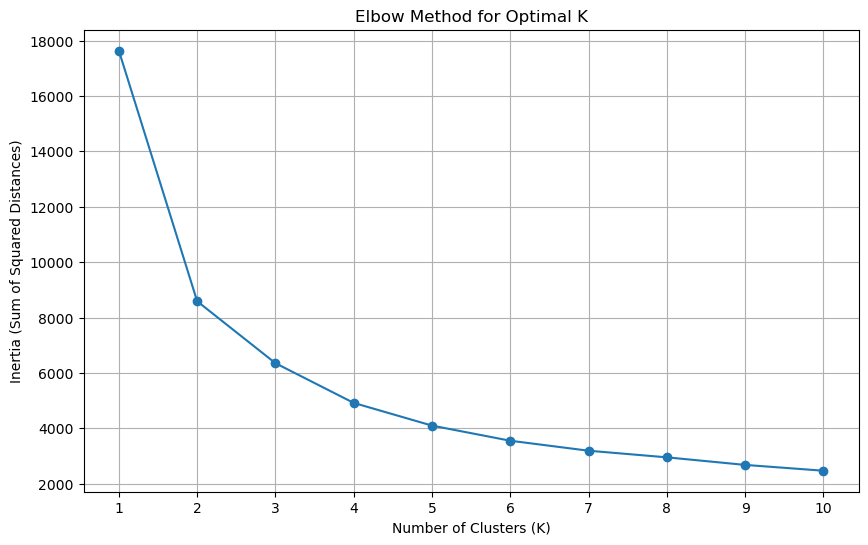

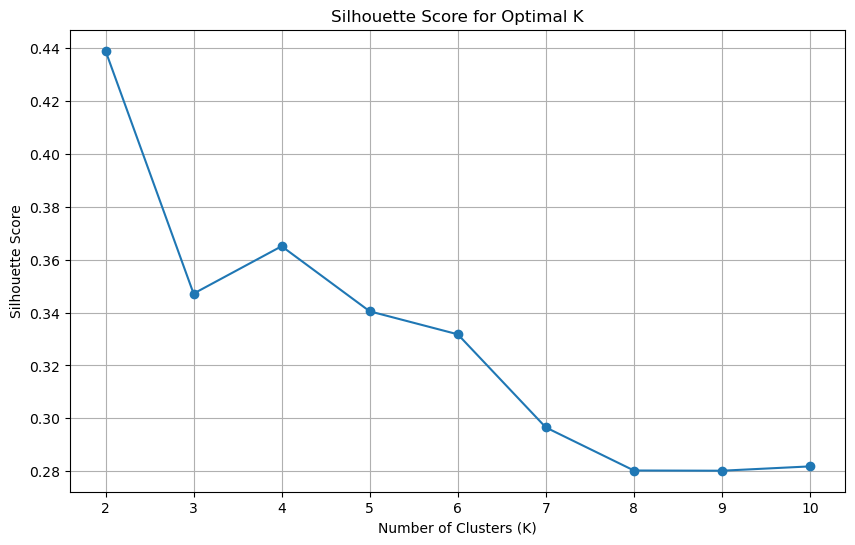


--- Inertia values for Elbow Method ---
K=1: 17634.00
K=2: 8588.79
K=3: 6352.77
K=4: 4918.88
K=5: 4099.64
K=6: 3553.39
K=7: 3192.77
K=8: 2953.92
K=9: 2680.70
K=10: 2470.73

--- Silhouette Scores ---
K=2: 0.4391
K=3: 0.3472
K=4: 0.3651
K=5: 0.3405
K=6: 0.3318
K=7: 0.2965
K=8: 0.2802
K=9: 0.2802
K=10: 0.2818


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced plots

# ---  Elbow Method to find optimal k ---

inertia = []
# I'll test k from 1 to 10. 
# It's good practice to run KMeans multiple times with different initial centroids (n_init)
# to avoid local optima. 'auto' is a good default for recent sklearn versions.
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# ---  Silhouette Score to find optimal k ---

silhouette_scores = []
# Silhouette score requires at least 2 clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled_df)
    score = silhouette_score(rfm_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

print("\n--- Inertia values for Elbow Method ---")
for i, val in enumerate(inertia):
    print(f"K={i+1}: {val:.2f}")

print("\n--- Silhouette Scores ---")
for i, score in enumerate(silhouette_scores):
    print(f"K={i+2}: {score:.4f}") # Start from K=2 for silhouette

 ### K-Means Clustering - Applying K-Means

#### Apply K-Means Clustering with k=4

#####
Reason:

Elbow Method: K=4 is a clear point where the rate of decrease in inertia significantly slows down, indicating that adding more clusters beyond this point provides diminishing returns in explaining variance.
Silhouette Score: While K=2 has the absolute highest score, K=4 has the second-highest score and is more robust than K=3's score. This suggests that 4 clusters still maintain a reasonable degree of separation and cohesion.
Business Interpretability: Having 4 segments (compared to 2 or 3) often allows for more nuanced and actionable marketing strategies. For example, you might distinguish between "Loyal High-Value," "Regular Mid-Value," "New/Promising," and "Infrequent/Churned" customers. This level of granularity is usually more valuable for a retail business.

In [12]:
# ---  Applying K-Means Clustering with the chosen k ---

# Chosen number of clusters based on Elbow and Silhouette analysis
optimal_k = 4 # I decided on 4 based on analysis

# Initialize and fit K-Means
# n_init='auto' is recommended to run K-Means multiple times with different centroid seeds
# and choosing the best result (lowest inertia).
# random_state ensures reproducibility of the results.
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(rfm_scaled_df)

# Adding the cluster labels back to my original RFM DataFrame (rfm_df)
# This is crucial for interpreting the clusters using the original, unscaled values.
rfm_df['Cluster'] = kmeans.labels_

print(f"\n--- K-Means Clustering with {optimal_k} Clusters Applied ---")
print("First 10 rows of RFM DataFrame with Cluster Labels:")
print(rfm_df.head(10))

print("\n--- Distribution of Customers per Cluster ---")
print(rfm_df['Cluster'].value_counts().sort_index())


--- K-Means Clustering with 4 Clusters Applied ---
First 10 rows of RFM DataFrame with Cluster Labels:
   Customer ID  Recency  Frequency  Monetary  Cluster
0        12346      326         12  77556.46        0
1        12347        2          8   5633.32        0
2        12348       75          5   2019.40        1
3        12349       19          4   4428.69        2
4        12350      310          1    334.40        3
5        12351      375          1    300.93        3
6        12352       36         10   2849.84        0
7        12353      204          2    406.76        3
8        12354      232          1   1079.40        3
9        12355      214          2    947.61        1

--- Distribution of Customers per Cluster ---
Cluster
0    1194
1    1469
2    1253
3    1962
Name: count, dtype: int64


### Cluster Analysis & Interpretation

#### Characterizing Each Cluster

I'll group the rfm_df (which now includes the 'Cluster' column) by the 'Cluster' column and calculate the mean of 'Recency', 'Frequency', and 'Monetary' for each.


--- Mean RFM Values for Each Cluster ---
            Recency  Frequency      Monetary
Cluster                                     
0         27.599665  19.288107  10979.157033
1        229.732471   5.055140   1984.205213
2         28.407821   3.043895    867.885045
3        396.229867   1.375637    322.149980


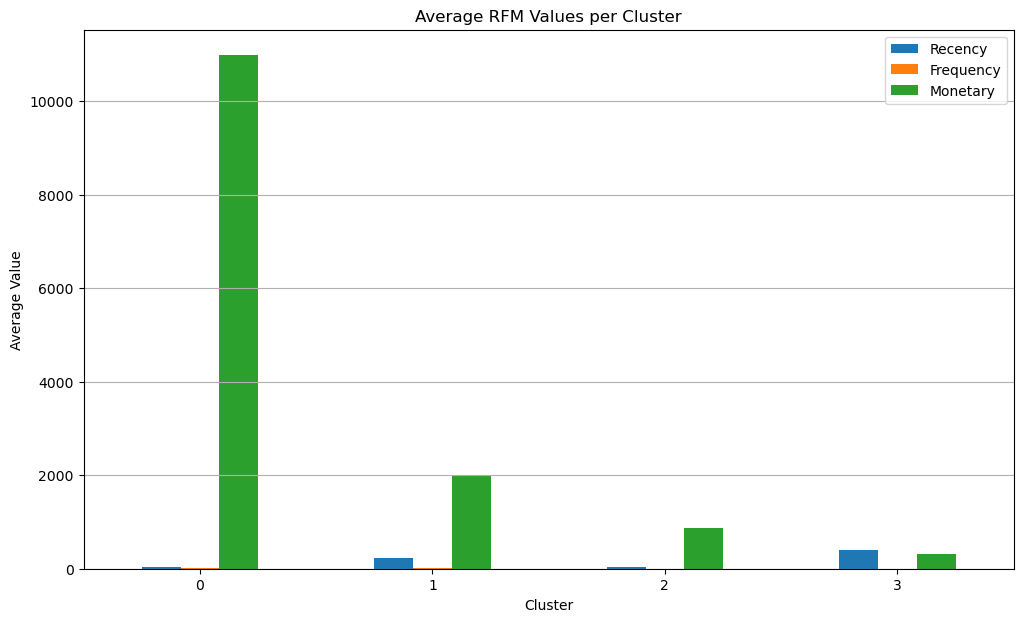


--- Mean RFM Values (Transposed for easy comparison) ---
Cluster               0            1           2           3
Recency       27.599665   229.732471   28.407821  396.229867
Frequency     19.288107     5.055140    3.043895    1.375637
Monetary   10979.157033  1984.205213  867.885045  322.149980


In [13]:
# ---  Characterize Each Cluster ---

# I will Group by 'Cluster' and calculate the mean for Recency, Frequency, and Monetary
# I will Use the original (unscaled) RFM values for interpretation
cluster_characteristics = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

print("\n--- Mean RFM Values for Each Cluster ---")
print(cluster_characteristics)

# Optional: Visualizing cluster characteristics (e.g., using a bar chart or radar chart)
# This will be very useful for my final report/presentation.

# Bar chart visualization
cluster_characteristics.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Average RFM Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.grid(axis='y')
plt.show()

# I  decided to transpose for easier comparison because I  prefer (columns as clusters)
print("\n--- Mean RFM Values (Transposed for easy comparison) ---")
print(cluster_characteristics.T)

### Actionable Recommendations

#####
Cluster 0: "Loyal Champions" / "High-Value Loyalists"

Characteristics: Very Recent, Very Frequent, Very High Monetary Value. These are your most valuable customers.
Goal: Retain them, reward them, and encourage continued high engagement.
Recommendations:
Exclusive Loyalty Programs: Offer tiered loyalty programs with exclusive benefits (e.g., early access to sales, new products, special discounts, free premium shipping).
Personalized Communications: Send highly personalized product recommendations based on their past purchase history.
VIP Treatment: Provide dedicated customer support or special recognition.
Feedback & Advocacy: Encourage them to provide feedback, write reviews, and become brand advocates (e.g., referral programs).
Cluster 1: "At-Risk Loyalists" / "Past Valued"

Characteristics: Not very Recent, Moderate Frequency, Decent Monetary Value. They used to be good but are drifting away.
Goal: Re-engage them before they churn completely. Win back their business.
Recommendations:
Win-Back Campaigns: Send targeted emails with personalized offers or discounts to entice them back.
"We Miss You" Messages: Acknowledge their past loyalty and inquire about their reasons for inactivity (e.g., short survey with an incentive).
Highlight New Products/Features: Inform them about recent improvements or new arrivals that might pique their interest.
Reminders: Gentle reminders of products they viewed or frequently purchased.
Cluster 2: "New & Promising" / "Recent Buyers"

Characteristics: Highly Recent, Less Frequent, Lower Monetary Value. They are active now but haven't built strong loyalty or spending habits yet.
Goal: Nurture them, encourage repeat purchases, and increase their frequency and monetary value.
Recommendations:
Welcome Series: Onboarding email series introducing different product categories, features, and benefits.
First-Purchase Incentives: Offer small discounts on their second purchase or free shipping to encourage immediate repeat business.
Product Discovery: Recommend complementary products based on their initial purchase.
Educational Content: Provide content that highlights the value of the platform or popular products to build engagement.
Cluster 3: "Churned/Lost" / "Low-Value Infrequent"

Characteristics: Least Recent, Least Frequent, Spends the least. These customers have likely churned or are of very low value.
Goal: Assess if worth re-engaging, or focus resources elsewhere.
Recommendations:
Low-Cost Re-engagement: Send very infrequent, broad promotions (e.g., seasonal sales) to see if there's any spark of interest. Avoid heavy investment.
Identify Root Cause (if possible): For a small sample, could survey (e.g., exit survey style) if resources allow, but typically, these are low priority.
Focus on Acquisition over Retention: For this segment, it's often more cost-effective to acquire new customers than to heavily invest in winning back these very low-engagement users.

In [14]:
import pandas as pd

# Exporting the RFM DataFrame with customer clusters
rfm_df.to_csv('customer_segments.csv', index=False)
print("Successfully exported 'customer_segments.csv'")

# Exporting the full cleaned transaction DataFrame
# This will be useful for other visuals like sales trends, top products, etc.
df.to_csv('cleaned_transactions.csv', index=False)
print("Successfully exported 'cleaned_transactions.csv'")

print("\nYour data is ready to be imported into Tableau!")
print("Files created: customer_segments.csv and cleaned_transactions.csv")

Successfully exported 'customer_segments.csv'
Successfully exported 'cleaned_transactions.csv'

Your data is ready to be imported into Tableau!
Files created: customer_segments.csv and cleaned_transactions.csv
